In [5]:
import numpy as np
import pandas as pd

# Load Dataset
dataset = pd.read_csv("tweets_doc2vec_tweet.csv")

# Decomposition
X = dataset.iloc[:,1:51].values

FileNotFoundError: [Errno 2] File tweets_doc2vec_tweet.csv does not exist: 'tweets_doc2vec_tweet.csv'

Elbow method:

In [6]:
#K-Means Clustering
from sklearn.cluster import KMeans
import time

### Find Best K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=int(time.time()))
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
##
### Draw WCSS for each K
import matplotlib.pyplot as plt
##
plt.plot(range(1, 11), wcss,'o-')
plt.title("Elbow Method")
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")
plt.savefig("doc2vec_tweet_elbow.png")
plt.show()

NameError: name 'X' is not defined

Average Silhouette method:

In [4]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=int(time.time()))
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette,'o-')
plt.title("Average Silhouette Method")
plt.xlabel("# of Clusters")
plt.ylabel("Average Silhouette")
plt.show()

NameError: name 'KMeans' is not defined

In [8]:
#Prediction
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=int(time.time()))
Y_pred = kmeans.fit_predict(X)

In [20]:
dataset['pred'] = Y_pred
dataset.to_csv("tweet_prediction.csv")

Visualization:

In [26]:
def PCA(X,isCorrMX):
    n = np.mat(X).shape[0]
    X = np.array(X)
    z = X-np.mean(X,axis=0)
    if(isCorrMX):
        covariance = np.corrcoef(X.T)    #use correlation matrix
    else:
        covariance = z.T.dot(z)/(n-1)    #use covariance matrix
    
    eigVals, eigVecs = np.linalg.eig(covariance)   #find eigenvalues and eigenvectors
    score = X.dot(eigVecs)   #score matrix
    
    plt.rcParams['font.sans-serif']=['Microsoft YaHei']
    variance = eigVals
    component = [i+1 for i in range(len(X[0]))]

    cumulative = []
    add = 0
    for i in range(len(eigVals)):
        add = add + eigVals[i]
        cumulative.append(add)
    cumulative_proportion = cumulative/sum(eigVals)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.bar(component,variance)
#     ax1.set_xlim(0, 40)
#     ax1.set_ylim(0, 800000)
    ax1.set_ylabel('Variance',fontsize=13)

    ax2 = ax1.twinx()
    ax2.plot(component, cumulative_proportion*100,'k',marker='o')
    ax2.set_ylabel('Cumulative Percentage（%）',fontsize=13)
    ax2.set_ylim(0, 100)
    
    return eigVecs,eigVals,score,fig

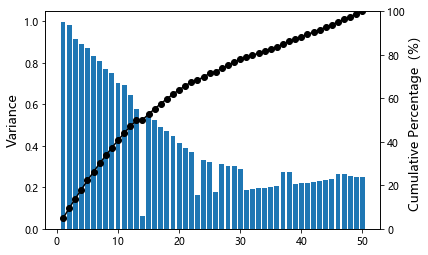

In [28]:
eigVecs,eigVals,score,fig = PCA(X,False)

In [41]:
df = pd.DataFrame(score[:,0:2], columns=['PC1','PC2'])
df['pred'] = Y_pred
df

,PC1,PC2,pred
0,-0.115031,-0.016885,2
1,-0.064930,0.139924,0
2,0.219243,-1.164256,2
3,-0.023625,-0.851616,0
4,-1.096639,0.478551,1
...,...,...,...
29498,-0.152947,0.592123,0
29499,0.162018,0.667615,3
29500,-1.175299,0.051416,0
29501,0.387947,-0.944313,2


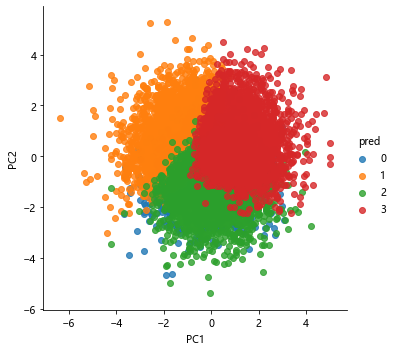

In [42]:
import seaborn as sns
facet = sns.lmplot(data=df, x='PC1', y='PC2', hue='pred', 
                   fit_reg=False, legend=True, legend_out=True)